In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
#FILTERING FOR DATA ANALYSTS ROLES IN INDIA
df_da_ind = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

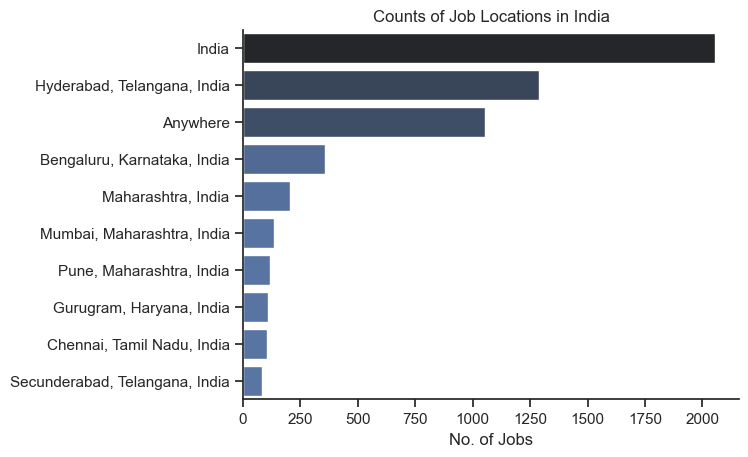

In [16]:
df_plot = df_da_ind['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations in India')
plt.ylabel('')
plt.xlabel('No. of Jobs')
plt.show()

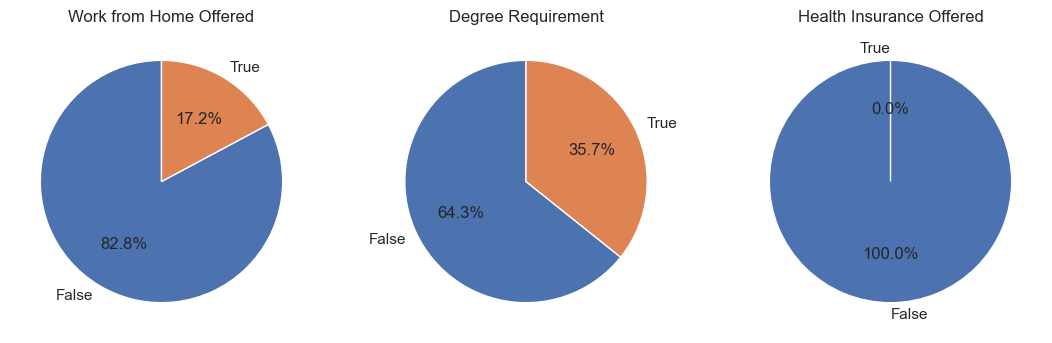

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_da_ind[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
    )
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


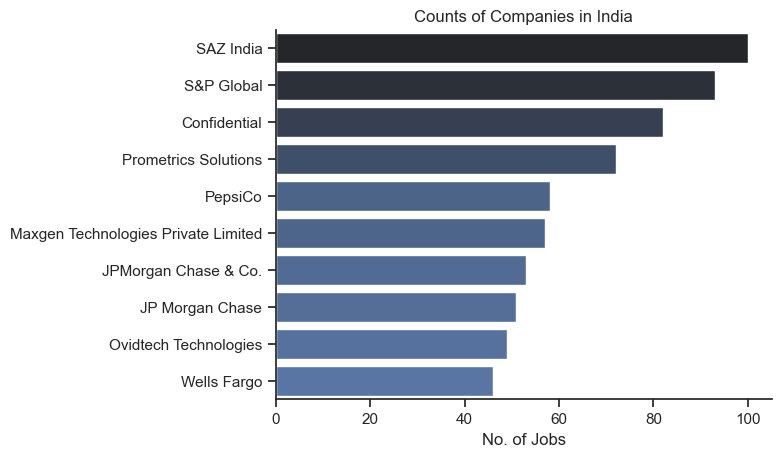

In [24]:
df_plot = df_da_ind['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies in India')
plt.ylabel('')
plt.xlabel('No. of Jobs')
plt.show()